## Sequential Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 1. Simple Linear Regression

### Data 만들기

In [35]:
def dataset(train_size=100): # tensorflow
  tf.random.set_seed(1)
  # x : 등간격 만들기
  x = tf.linspace(0.0, 10.0, train_size)
  # y : 수식에 의한 결정 (y = 3x - 10)
  y_label = 3.0*x -10.0
  # y variation (mean, stddev 조정)
  y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 2.0)

  return x, y, y_label

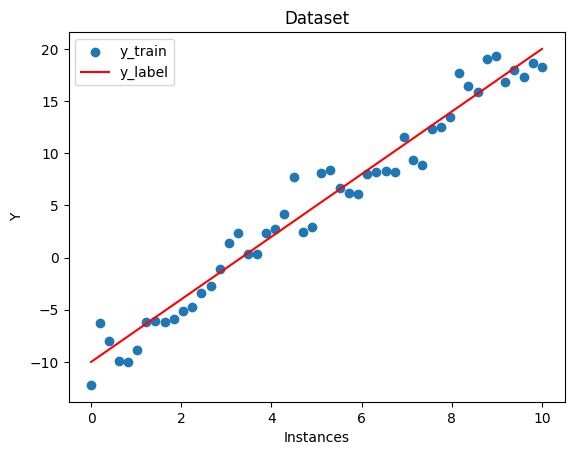

In [36]:
# x, y, y_label = dataset() # defualt = 100
x, y, y_label = dataset(50)
fig, ax = plt.subplots()
ax.scatter(x, y, label='y_train')
ax.plot(x, y_label, color='red', label='y_label')
ax.set_xlabel('Instances')
ax.set_ylabel('Y')
ax.set_title('Dataset')
ax.legend()
plt.show()

### Model 만들기
+ sequential > functional > class
+ keras sequential API
  + input -> sequential(layer,layer,..) -> output

In [37]:
# sequentail
model = tf.keras.Sequential()
# input : x 개수, units : output layer 개수
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
# functinal
inputs = tf.keras.Input(shape=(1,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="simple_linear_regression")
model.summary()

Model: "simple_linear_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 학습 시키기
+ learning_rate 변경
+ optimizer 변경 (RMSprop, adagrad, SGD, Adam)
+ batch_size 변경

In [39]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

In [40]:
record = model.fit(x, y, epochs=100, batch_size=4, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

Epoch 1/100
13/13 - 0s - loss: 35.7840 - 187ms/epoch - 14ms/step
Epoch 2/100
13/13 - 0s - loss: 27.7790 - 16ms/epoch - 1ms/step
Epoch 3/100
13/13 - 0s - loss: 23.1984 - 16ms/epoch - 1ms/step
Epoch 4/100
13/13 - 0s - loss: 19.3960 - 0s/epoch - 0s/step
Epoch 5/100
13/13 - 0s - loss: 16.5235 - 16ms/epoch - 1ms/step
Epoch 6/100
13/13 - 0s - loss: 13.8147 - 0s/epoch - 0s/step
Epoch 7/100
13/13 - 0s - loss: 11.4776 - 16ms/epoch - 1ms/step
Epoch 8/100
13/13 - 0s - loss: 9.8780 - 16ms/epoch - 1ms/step
Epoch 9/100
13/13 - 0s - loss: 7.5047 - 0s/epoch - 0s/step
Epoch 10/100
13/13 - 0s - loss: 6.7438 - 16ms/epoch - 1ms/step
Epoch 11/100
13/13 - 0s - loss: 5.0373 - 0s/epoch - 0s/step
Epoch 12/100
13/13 - 0s - loss: 4.5070 - 0s/epoch - 0s/step
Epoch 13/100
13/13 - 0s - loss: 4.0620 - 16ms/epoch - 1ms/step
Epoch 14/100
13/13 - 0s - loss: 3.6168 - 16ms/epoch - 1ms/step
Epoch 15/100
13/13 - 0s - loss: 3.8508 - 0s/epoch - 0s/step
Epoch 16/100
13/13 - 0s - loss: 3.0202 - 16ms/epoch - 1ms/step
Epoch 17/1

### 결과값 확인

In [41]:
loss = record.history['loss']
print("loss:", loss[-1])
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[0].bias.numpy()

loss: 3.7260210514068604
weights: [[2.9814422]]
bias: [-10.328279]


### 시각화

2/2 [==============================] - 0s 0s/step


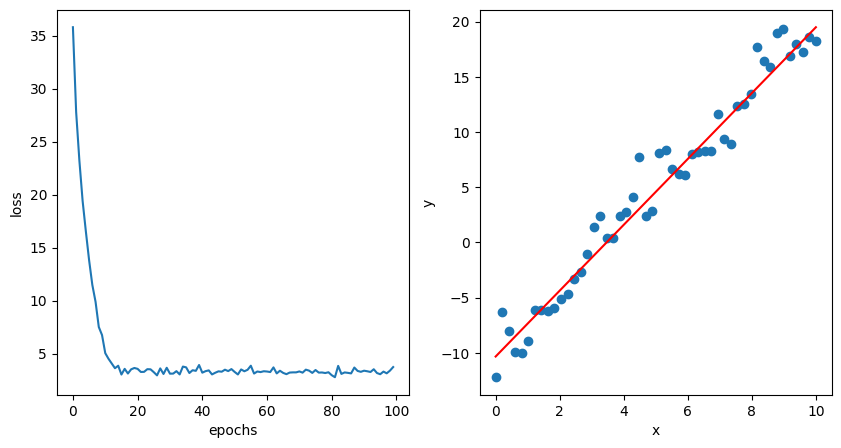

In [42]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(loss)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].scatter(x, y)
y_pred = model.predict(x)
axs[1].plot(x, y_pred, color='red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

## 2. Linear Regression with two variables
+ [ 2 x 2 ] [ 2 x 1 ] = [ 2 x 1 ]

### Data 만들기
+ data에 따라 결과 달라지는거 확인

In [58]:
def dataset():
  train_data = np.array([
                        # x0, x1, t
                        [ 1,  1,  6],
                        [ 2,  1,  7],
                        [ 3,  2,  10],
                        [ 4,  2,  11],
                        [ 5,  3,  14],
                        [ 6,  3,  12],
                        [ 7,  4,  18],
                        [ 8,  4,  19]], dtype=np.float32)
  return train_data[:, :-1], train_data[:, -1:]

X, y = dataset()

In [62]:
def dataset(train_size=100):
  tf.random.set_seed(1)
  x0 = tf.linspace(0.0, 10.0, num=train_size)
  x1 = tf.linspace(-2., 2., num=train_size)
  y_label = 1*x0 + 2*x1 + 3   # y = 1*x0 + 2*x1 + 3
  y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 2.0)
  X = tf.concat([tf.reshape(x0, [-1,1]), tf.reshape(x1, [-1, 1])], 1)
  return X, y, y_label

X, y, y_label = dataset()

### Model 만들기

In [63]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### 학습시키기

In [64]:
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

In [65]:
# 0: silent, 1:progress bar,  2: one line per epoch
history = model.fit(X, y, epochs=100, batch_size=4, verbose=2)

Epoch 1/100
25/25 - 0s - loss: 4.1935 - 204ms/epoch - 8ms/step
Epoch 2/100
25/25 - 0s - loss: 4.1732 - 16ms/epoch - 626us/step
Epoch 3/100
25/25 - 0s - loss: 4.2155 - 16ms/epoch - 624us/step
Epoch 4/100
25/25 - 0s - loss: 3.7707 - 16ms/epoch - 624us/step
Epoch 5/100
25/25 - 0s - loss: 4.6745 - 16ms/epoch - 625us/step
Epoch 6/100
25/25 - 0s - loss: 4.3954 - 16ms/epoch - 626us/step
Epoch 7/100
25/25 - 0s - loss: 4.0339 - 16ms/epoch - 624us/step
Epoch 8/100
25/25 - 0s - loss: 4.2505 - 16ms/epoch - 625us/step
Epoch 9/100
25/25 - 0s - loss: 4.2378 - 16ms/epoch - 625us/step
Epoch 10/100
25/25 - 0s - loss: 4.0736 - 16ms/epoch - 626us/step
Epoch 11/100
25/25 - 0s - loss: 4.2792 - 16ms/epoch - 626us/step
Epoch 12/100
25/25 - 0s - loss: 3.8179 - 16ms/epoch - 625us/step
Epoch 13/100
25/25 - 0s - loss: 3.8346 - 16ms/epoch - 624us/step
Epoch 14/100
25/25 - 0s - loss: 4.3918 - 16ms/epoch - 626us/step
Epoch 15/100
25/25 - 0s - loss: 3.8194 - 16ms/epoch - 624us/step
Epoch 16/100
25/25 - 0s - loss: 4.2

In [66]:
X.shape

TensorShape([100, 2])

### 결과값 확인

In [67]:
loss = history.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

loss: 4.0543718338012695
weights: [[1.5079396]
 [0.8240668]]
bias: [0.30496046]


### 시각화

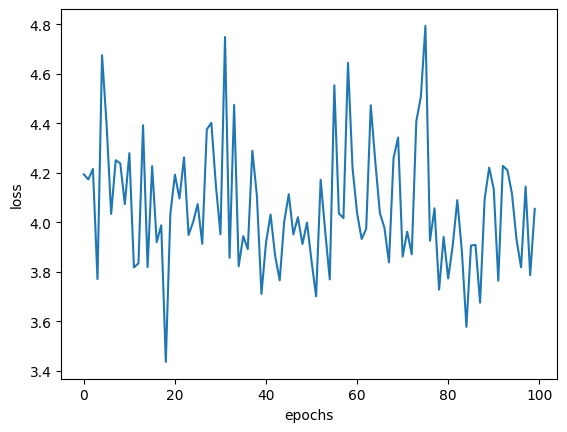

In [68]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## 2-1. 참고

In [70]:
# t = 1*x0 + 2*x1 + 3
def dataset2():
  x0 = np.linspace(1, 10, 20)
  x1 = np.linspace(-2, 2, 20)
  y = 1* x0 + 2*x1 + 3
  return x0, x1, y

def dataset3(train_size=100):
  tf.random.set_seed(1)
  x0 = tf.linspace(0.0, 10.0, num=train_size)
  x1 = tf.linspace(-2.0, 2.0, num=train_size)
  y_label = 1*x0 + 2*x1 + 3   # y = 1*x0 + 2*x1 + 3
  y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 2.0)
  X = tf.concat([tf.reshape(x0, [-1,1]), tf.reshape(x1, [-1,1])], 1)
  return X, y, y_label

X, y, y_label = dataset3()

In [71]:
def make_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
  model.summary()
  return model

model = make_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [72]:
def configure(model):
  opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
  model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
  return model

config_model = configure(model)

In [73]:
def train(model, X, y):
  # 0: silent, 1:progress bar,  2: one line per epoch
  history = model.fit(X, y, epochs=100, batch_size=4, verbose=2)
  return history

history = train(model, X, y)

Epoch 1/100
25/25 - 0s - loss: 14.8694 - 156ms/epoch - 6ms/step
Epoch 2/100
25/25 - 0s - loss: 3.9832 - 16ms/epoch - 625us/step
Epoch 3/100
25/25 - 0s - loss: 3.8656 - 16ms/epoch - 625us/step
Epoch 4/100
25/25 - 0s - loss: 4.2302 - 16ms/epoch - 625us/step
Epoch 5/100
25/25 - 0s - loss: 4.2526 - 16ms/epoch - 626us/step
Epoch 6/100
25/25 - 0s - loss: 4.1596 - 16ms/epoch - 624us/step
Epoch 7/100
25/25 - 0s - loss: 4.3853 - 16ms/epoch - 626us/step
Epoch 8/100
25/25 - 0s - loss: 4.1762 - 16ms/epoch - 624us/step
Epoch 9/100
25/25 - 0s - loss: 4.1780 - 25ms/epoch - 996us/step
Epoch 10/100
25/25 - 0s - loss: 4.0320 - 16ms/epoch - 626us/step
Epoch 11/100
25/25 - 0s - loss: 4.1454 - 16ms/epoch - 625us/step
Epoch 12/100
25/25 - 0s - loss: 4.2266 - 16ms/epoch - 624us/step
Epoch 13/100
25/25 - 0s - loss: 3.9880 - 16ms/epoch - 625us/step
Epoch 14/100
25/25 - 0s - loss: 4.4483 - 16ms/epoch - 625us/step
Epoch 15/100
25/25 - 0s - loss: 4.1370 - 16ms/epoch - 625us/step
Epoch 16/100
25/25 - 0s - loss: 4.

In [74]:
def print_train_result(model, history):
  loss = history.history['loss']
  print("loss:", loss[-1])
  #print(model.get_weights())
  print("weights:", model.layers[0].weights[0].numpy())
  print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

print_train_result(model, history)

loss: 4.326468467712402
weights: [[1.554816 ]
 [1.0399076]]
bias: [0.12618811]


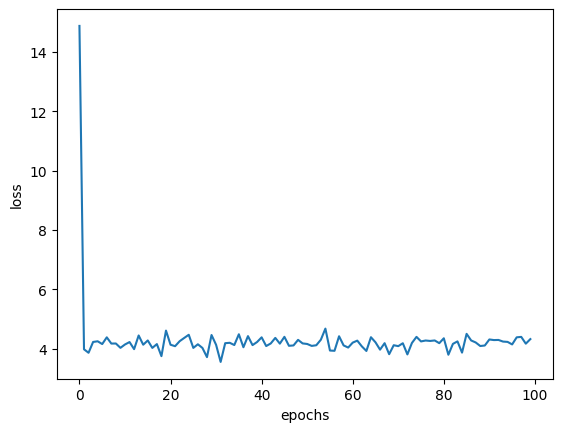

In [75]:
def plot_result(data, ylabel, xlabel='epochs'):
  plt.plot(data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

plot_result(history.history['loss'], 'loss')

In [79]:
def plot_predict(model, X, y, y_label):
  fig = plt.figure(figsize=(10, 5))
  ax = fig.add_subplot(projection='3d')
  #ax.scatter(X[:, 0], X[:, 1], y_true)
  #ax.plot(tf.reshape(X[:, 0], [-1]), tf.reshape(X[:, 1], [-1]), tf.reshape(y_true, [-1]))
  ax.scatter(X[:, 0], X[:, 1], y)
  y_pred = model.predict(X)
  ax.plot(X[:, 0], X[:, 1], tf.reshape(y_pred,[-1]), color='red') # model line
  ax.plot(X[:, 0], X[:, 1], y_label, color='yellow') # original line
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')

  plt.show()

4/4 [==============================] - 0s 5ms/step


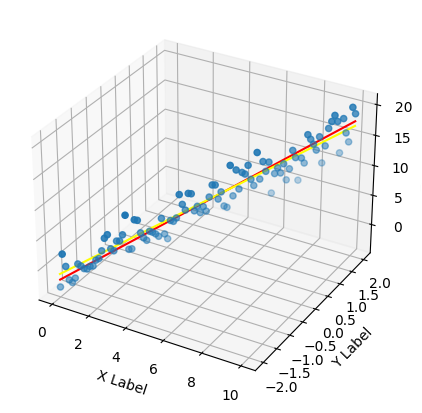

In [80]:
plot_predict(model, X, y, y_label)

## 3. Polynomial Regression

### DATA 만들기

In [103]:
def dataset(train_size=50): # tensorflow
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y_label = 3.0*(x**3) + 2.0*(x**2) + 4.0*x + 5
     y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y, y_label

x, y, y_label = dataset()

In [104]:
X.shape

(50, 4)

In [105]:
# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

In [106]:
X.shape

(50, 4)

### Model 만들기

In [118]:
model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1, use_bias=False, input_dim=4)])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 학습 시키기

In [119]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')

In [120]:
ret = model.fit(X, y, epochs=500, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

Epoch 1/500
2/2 - 0s - loss: 44110.7852 - 172ms/epoch - 86ms/step
Epoch 2/500
2/2 - 0s - loss: 43620.0117 - 0s/epoch - 0s/step
Epoch 3/500
2/2 - 0s - loss: 43211.6914 - 0s/epoch - 0s/step
Epoch 4/500
2/2 - 0s - loss: 42804.3008 - 16ms/epoch - 8ms/step
Epoch 5/500
2/2 - 0s - loss: 42350.8008 - 0s/epoch - 0s/step
Epoch 6/500
2/2 - 0s - loss: 41960.4453 - 0s/epoch - 0s/step
Epoch 7/500
2/2 - 0s - loss: 41504.2031 - 0s/epoch - 0s/step
Epoch 8/500
2/2 - 0s - loss: 41099.2188 - 0s/epoch - 0s/step
Epoch 9/500
2/2 - 0s - loss: 40683.7930 - 16ms/epoch - 8ms/step
Epoch 10/500
2/2 - 0s - loss: 40269.2461 - 0s/epoch - 0s/step
Epoch 11/500
2/2 - 0s - loss: 39813.8828 - 0s/epoch - 0s/step
Epoch 12/500
2/2 - 0s - loss: 39481.3242 - 0s/epoch - 0s/step
Epoch 13/500
2/2 - 0s - loss: 39025.8203 - 0s/epoch - 0s/step
Epoch 14/500
2/2 - 0s - loss: 38647.1406 - 16ms/epoch - 8ms/step
Epoch 15/500
2/2 - 0s - loss: 38267.7383 - 0s/epoch - 0s/step
Epoch 16/500
2/2 - 0s - loss: 37841.5977 - 0s/epoch - 0s/step
Epo

### 결과값 확인

In [121]:
loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[0].weights[0].numpy())

loss: 647.5989379882812
weights: [[2.864393 ]
 [2.9331334]
 [1.7670718]
 [3.0668347]]


### 시각화

2/2 [==============================] - 0s 0s/step


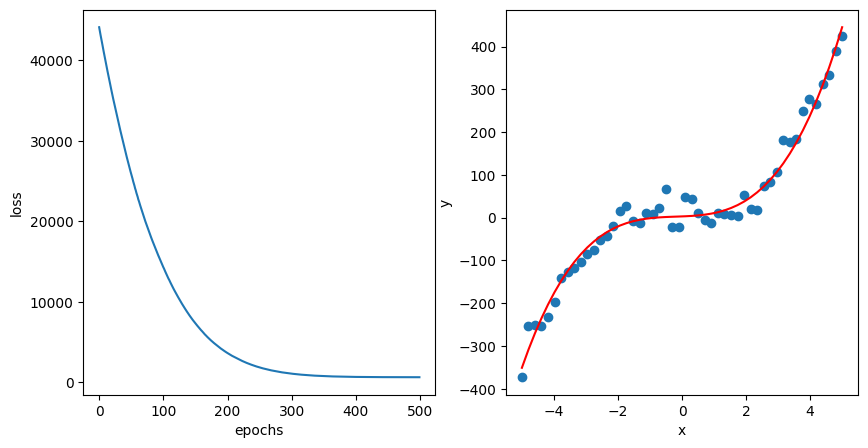

In [123]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0].plot(loss)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('loss')

axs[1].scatter(x, y)
y_pred = model.predict(X)
axs[1].plot(x, y_pred, color='red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

## Benchmark

In [124]:
def dataset(train_size=100): # tensorflow
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y_label = 3.0*x**3 + 2.0*x**2 + x + 4.0 + 5
     y = y_label + tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y, y_label

x, y, y_label = dataset()

In [125]:
def min_max_scaler(data):
  x_min, x_max = tf.reduce_min(data), tf.reduce_max(data)
  x_std = (data-x_min)/(x_max-x_min)
  #print(x_std)
  return x_std, x_min, x_max

In [126]:
def standard_scaler(data):
  # z = (x - u) / s
  x_mean = tf.reduce_mean(x)
  x_std = tf.math.reduce_std(x)
  x_scaled = (data - x_mean) / x_std
  return x_scaled, x_mean, x_std

In [133]:
def transform_data(x, y, y_label, scaler):
  x_scaled, x_mean, x_std = standard_scaler(x)
  y_scaled, y_mean, y_std = standard_scaler(y)
  y_label_scaled, y_label_mean, y_label_std = standard_scaler(y_label)
  x_scaled = tf.reshape(x_scaled, [-1, 1])
  X = tf.concat([x_scaled, x_scaled**2, x_scaled**3], 1)
  return X, y_scaled, y_label_scaled

X, y_scaled, y_label_scaled = transform_data(x, y, y_label, standard_scaler)

In [128]:
def make_hyper_params():
  params = {
      'opt': ['Adam', 'RMSprop','SGD'],
      'lr': [0.1, 0.05, 0.01],
      'loss_fn': ['MAE', 'MSE'],
      'batch': [1, 4, 8],
  }
  import itertools
  permutations_dicts = [dict(zip(params.keys(), v))  for v in itertools.product(*params.values())]
  permutations_dicts
  return permutations_dicts

params = make_hyper_params()
#params

In [129]:
def make_optimizer(name, lr):
  if name == 'Adam':
    return tf.keras.optimizers.Adam(learning_rate=lr)
  elif name == 'RMSprop':
    return tf.keras.optimizers.RMSprop(learning_rate=lr)
  elif name == 'SGD':
    return tf.keras.optimizers.SGD(learning_rate=lr)

def make_loss_func(name):
  if name == 'MAE':
    return tf.keras.losses.MeanAbsoluteError()
  elif name == 'MSE':
    return tf.keras.losses.MeanSquaredError()

def make_model(opt='Adam', lr='0.01', loss_fn='MSE', **kargs):
  model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1,
                               bias_initializer=tf.keras.initializers.Constant(1),\
                               input_dim=3)])
  #print('opt: {}, lr: {}, loss_fn: {}'.format(opt, lr, loss_fn))
  opt = make_optimizer(opt, lr)
  loss = make_loss_func(loss_fn)
  model.compile(optimizer=opt, loss=loss)
  return model

def train(model, X, y, epochs=50, batch=1, callbacks=None, **kargs):
  #print('batch', batch)
  record = model.fit(X, y, epochs=epochs, batch_size=batch, callbacks=callbacks, verbose=0)
  return record

def get_result(model, record):
    loss = record.history['loss']
    weights = model.layers[0].weights[:-1][0].numpy()
    bias = model.layers[0].weights[-1].numpy()
    return loss, weights, bias

## 시각화

********************
opt: Adam, lr: 0.1, loss_fn: MAE, batch: 1
min_loss: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00, loss: 7.95
loss: 7.95, weights: [[-1.7439097]
 [ 6.854529 ]
 [28.78155  ]], bias: [0.22639272]


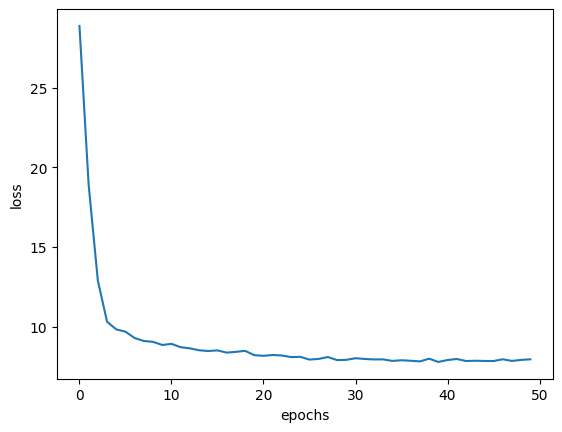

NameError: name 'x_mean' is not defined

In [131]:
def plot_result(data, ylabel, xlabel='epochs'):
  plt.plot(data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def plot_predict(model, X_train, y_true):
  def standard_inverse(data, mean, std):
    return data * std + mean
  x_origin = standard_inverse(X_train[:,0], x_mean, x_std)
  y_origin = standard_inverse(y_true, y_label_mean, y_std)
  plt.scatter(x_origin, y_origin)
  y_pred = model.predict(X_train)
  y_pred = standard_inverse(y_pred, y_mean, y_std)
  plt.plot(x_origin, y_pred, color='red')
  plt.show()

def benchmark(X, y, params):
  import sys
  min_loss = sys.float_info.max
  for param in params:
    print('*'*20)
    print('opt: {}, lr: {}, loss_fn: {}, batch: {}'\
          .format(param['opt'], param['lr'], param['loss_fn'], param['batch']))
    model = make_model(**param)
    record = train(model, X, y, **param)
    loss, weights, bias = get_result(model, record)
    print('min_loss: {:.2f}, loss: {:.2f}'.format(min_loss, loss[-1]))
    if loss[-1] < min_loss:
      print('loss: {:.2f}, weights: {}, bias: {}'.format(loss[-1], weights, bias))
      plot_result(loss, 'loss')
      plot_predict(model, X, y)
      min_loss = loss[-1]

benchmark(X, y_scaled, params)